In [74]:
import numpy as np
import time
from sklearn.linear_model import LinearRegression
import pandas as pd    
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns
from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from sklearn.svm import SVC
from sklearn.decomposition import PCA

### 1. Data Preprocessing

In [75]:
# Reading data from CSV
vehicles_df = pd.read_csv("vehicle.csv")
vehicles_df.head(10)

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   
5          107          NaN                 106.0         172.0   
6           97         43.0                  73.0         173.0   
7           90         43.0                  66.0         157.0   
8           86         34.0                  62.0         140.0   
9           93         44.0                  98.0           NaN   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   
5                  50.0                        6          255.0   
6                  65.0                        6          153.0   
7                  65.0                        9          137.0   
8                  61.0                        7          122.0   
9                  62.0                       11          183.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   
5           26.0                    28.0                        169   
6           42.0                    19.0                        143   
7           48.0                    18.0                        146   
8           54.0                    17.0                        127   
9           36.0                    22.0                        146   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   
5            280.0              957.0                      264.0   
6            176.0              361.0                      172.0   
7            162.0              281.0                      164.0   
8            141.0              223.0                      112.0   
9            202.0              505.0                      152.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   
5                         85.0             5.0               9.0   
6                         66.0            13.0               1.0   
7                         67.0             3.0               3.0   
8                         64.0             2.0              14.0   
9                         64.0             4.0              14.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            1

In [76]:
# Shape of data frame - (rows, columns)
vehicles_df.shape

(846, 19)

In [77]:
# feature data types and check for null values
vehicles_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    841 non-null float64
distance_circularity           842 non-null float64
radius_ratio                   840 non-null float64
pr.axis_aspect_ratio           844 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  845 non-null float64
elongatedness                  845 non-null float64
pr.axis_rectangularity         843 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                843 non-null float64
scaled_variance.1              844 non-null float64
scaled_radius_of_gyration      844 non-null float64
scaled_radius_of_gyration.1    842 non-null float64
skewness_about                 840 non-null float64
skewness_about.1               845 non-null float64
skewness_about.2               845 non-null float64
hollows_ratio    

In [78]:
# Number of null values in different fields
vehicles_df.isna().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

In [79]:
# Encoding the string categorical to numerical categorical variable 
vehicle_data = vehicles_df.copy()

vehicle_data["class"] = LabelEncoder().fit_transform(vehicles_df["class"])
vehicle_data.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio  class  
0             187.0            197      2  
1             189.0            199      2  
2             188.0            196      1  
3             199.0            207      2  
4             180.0            183      0

In [80]:
# Basic statistical summary of all features
vehicle_data.describe().T

count        mean         std    min     25%  \
compactness                  846.0   93.678487    8.234474   73.0   87.00   
circularity                  841.0   44.828775    6.152172   33.0   40.00   
distance_circularity         842.0   82.110451   15.778292   40.0   70.00   
radius_ratio                 840.0  168.888095   33.520198  104.0  141.00   
pr.axis_aspect_ratio         844.0   61.678910    7.891463   47.0   57.00   
max.length_aspect_ratio      846.0    8.567376    4.601217    2.0    7.00   
scatter_ratio                845.0  168.901775   33.214848  112.0  147.00   
elongatedness                845.0   40.933728    7.816186   26.0   33.00   
pr.axis_rectangularity       843.0   20.582444    2.592933   17.0   19.00   
max.length_rectangularity    846.0  147.998818   14.515652  118.0  137.00   
scaled_variance              843.0  188.631079   31.411004  130.0  167.00   
scaled_variance.1            844.0  439.494076  176.666903  184.0  318.00   
scaled_radius_of_gyration    844.0  174.709716   32.584808  109.0  149.00   
scaled_radius_of_gyration.1  842.0   72.447743    7.486190   59.0   67.00   
skewness_about               840.0    6.364286    4.920649    0.0    2.00   
skewness_about.1             845.0   12.602367    8.936081    0.0    5.00   
skewness_about.2             845.0  188.919527    6.155809  176.0  184.00   
hollows_ratio                846.0  195.632388    7.438797  181.0  190.25   
class                        846.0    0.977541    0.702130    0.0    0.00   

                               50%    75%     max  
compactness                   93.0  100.0   119.0  
circularity                   44.0   49.0    59.0  
distance_circularity          80.0   98.0   112.0  
radius_ratio                 167.0  195.0   333.0  
pr.axis_aspect_ratio          61.0   65.0   138.0  
max.length_aspect_ratio        8.0   10.0    55.0  
scatter_ratio                157.0  198.0   265.0  
elongatedness                 43.0   46.0    61.0  
pr.axis_rectangularity        20.0   23.0    29.0  
max.length_rectangularity    146.0  159.0   188.0  
scaled_variance              179.0  217.0   320.0  
scaled_variance.1            363.5  587.0  1018.0  
scaled_radius_of_gyration    173.5  198.0   268.0  
scaled_radius_of_gyration.1   71.5   75.0   135.0  
skewness_about                 6.0    9.0    22.0  
skewness_about.1              11.0   19.0    41.0  
skewness_about.2             188.0  193.0   206.0  
hollows_ratio                197.0  201.0   211.0  
class                          1.0    1.0     2.0

In [81]:
# Filling null values using median as some columns have outliers

# As the target column class has 0 null values hence imputer won't transform any values, therefore no need to drop the column
# while filling the null values

imp = SimpleImputer(strategy="median")
imp.fit(vehicle_data)
vehicle_data = pd.DataFrame(np.array(imp.transform(vehicle_data)), columns = vehicles_df.columns)

print(vehicle_data.shape)
vehicle_data.head(10)

(846, 19)


compactness  circularity  distance_circularity  radius_ratio  \
0         95.0         48.0                  83.0         178.0   
1         91.0         41.0                  84.0         141.0   
2        104.0         50.0                 106.0         209.0   
3         93.0         41.0                  82.0         159.0   
4         85.0         44.0                  70.0         205.0   
5        107.0         44.0                 106.0         172.0   
6         97.0         43.0                  73.0         173.0   
7         90.0         43.0                  66.0         157.0   
8         86.0         34.0                  62.0         140.0   
9         93.0         44.0                  98.0         167.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                     10.0          162.0   
1                  57.0                      9.0          149.0   
2                  66.0                     10.0          207.0   
3                  63.0                      9.0          144.0   
4                 103.0                     52.0          149.0   
5                  50.0                      6.0          255.0   
6                  65.0                      6.0          153.0   
7                  65.0                      9.0          137.0   
8                  61.0                      7.0          122.0   
9                  62.0                     11.0          183.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                      159.0   
1           45.0                    19.0                      143.0   
2           32.0                    23.0                      158.0   
3           46.0                    19.0                      143.0   
4           45.0                    19.0                      144.0   
5           26.0                    28.0                      169.0   
6           42.0                    19.0                      143.0   
7           48.0                    18.0                      146.0   
8           54.0                    17.0                      127.0   
9           36.0                    22.0                      146.0   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   
5            280.0              957.0                      264.0   
6            176.0              361.0                      172.0   
7            162.0              281.0                      164.0   
8            141.0              223.0                      112.0   
9            202.0              505.0                      152.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   
5                         85.0             5.0               9.0   
6                         66.0            13.0               1.0   
7                         67.0             3.0               3.0   
8                         64.0             2.0              14.0   
9                         64.0             4.0              14.0   

   skewness_about.2  hollows_ratio  class  
0             187.0          197.0    2.0  
1             189.0          199.0    2.0  
2             188.0          196.0    1.0  
3             199.0          207.0    2.0  
4             180.0        

In [82]:
# No null objects left in the dataset
vehicle_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null float64
circularity                    846 non-null float64
distance_circularity           846 non-null float64
radius_ratio                   846 non-null float64
pr.axis_aspect_ratio           846 non-null float64
max.length_aspect_ratio        846 non-null float64
scatter_ratio                  846 non-null float64
elongatedness                  846 non-null float64
pr.axis_rectangularity         846 non-null float64
max.length_rectangularity      846 non-null float64
scaled_variance                846 non-null float64
scaled_variance.1              846 non-null float64
scaled_radius_of_gyration      846 non-null float64
scaled_radius_of_gyration.1    846 non-null float64
skewness_about                 846 non-null float64
skewness_about.1               846 non-null float64
skewness_about.2               846 non-null float64
hollows_rat

### 2. Understanding the attributes

([<matplotlib.axis.YTick at 0x20a2e2ee908>,
 <a list of 19 Text yticklabel objects>)

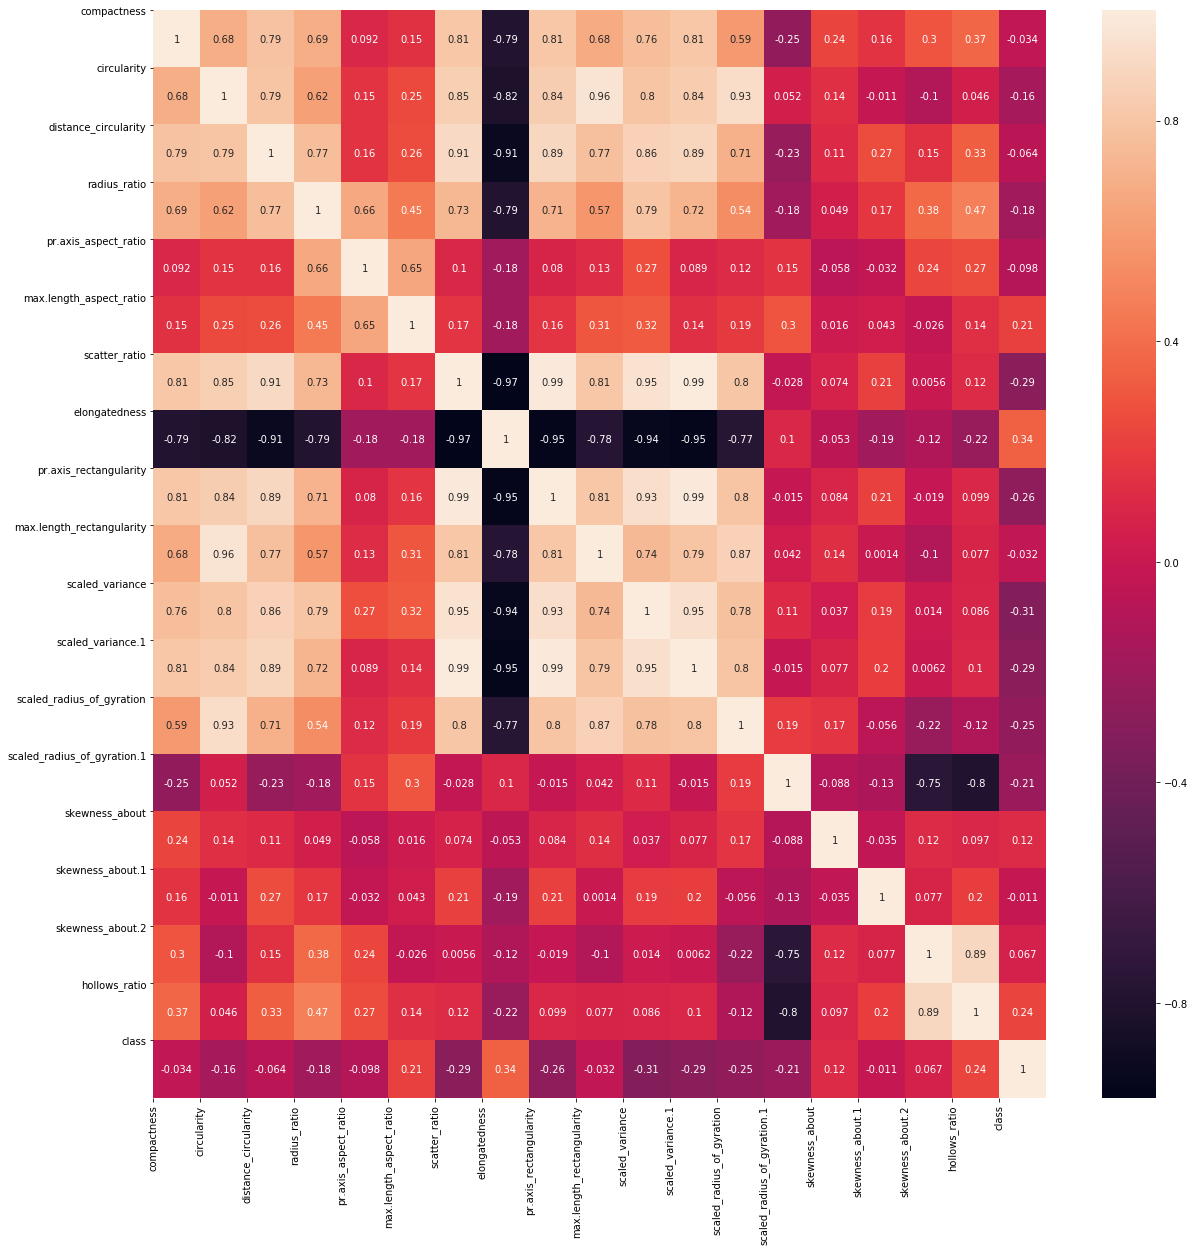

In [83]:
# Plotting heatmap for the correlation matrix for better visualization

correlation_matrix = vehicle_data.corr()
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(correlation_matrix, annot=True, ax=ax)

plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)

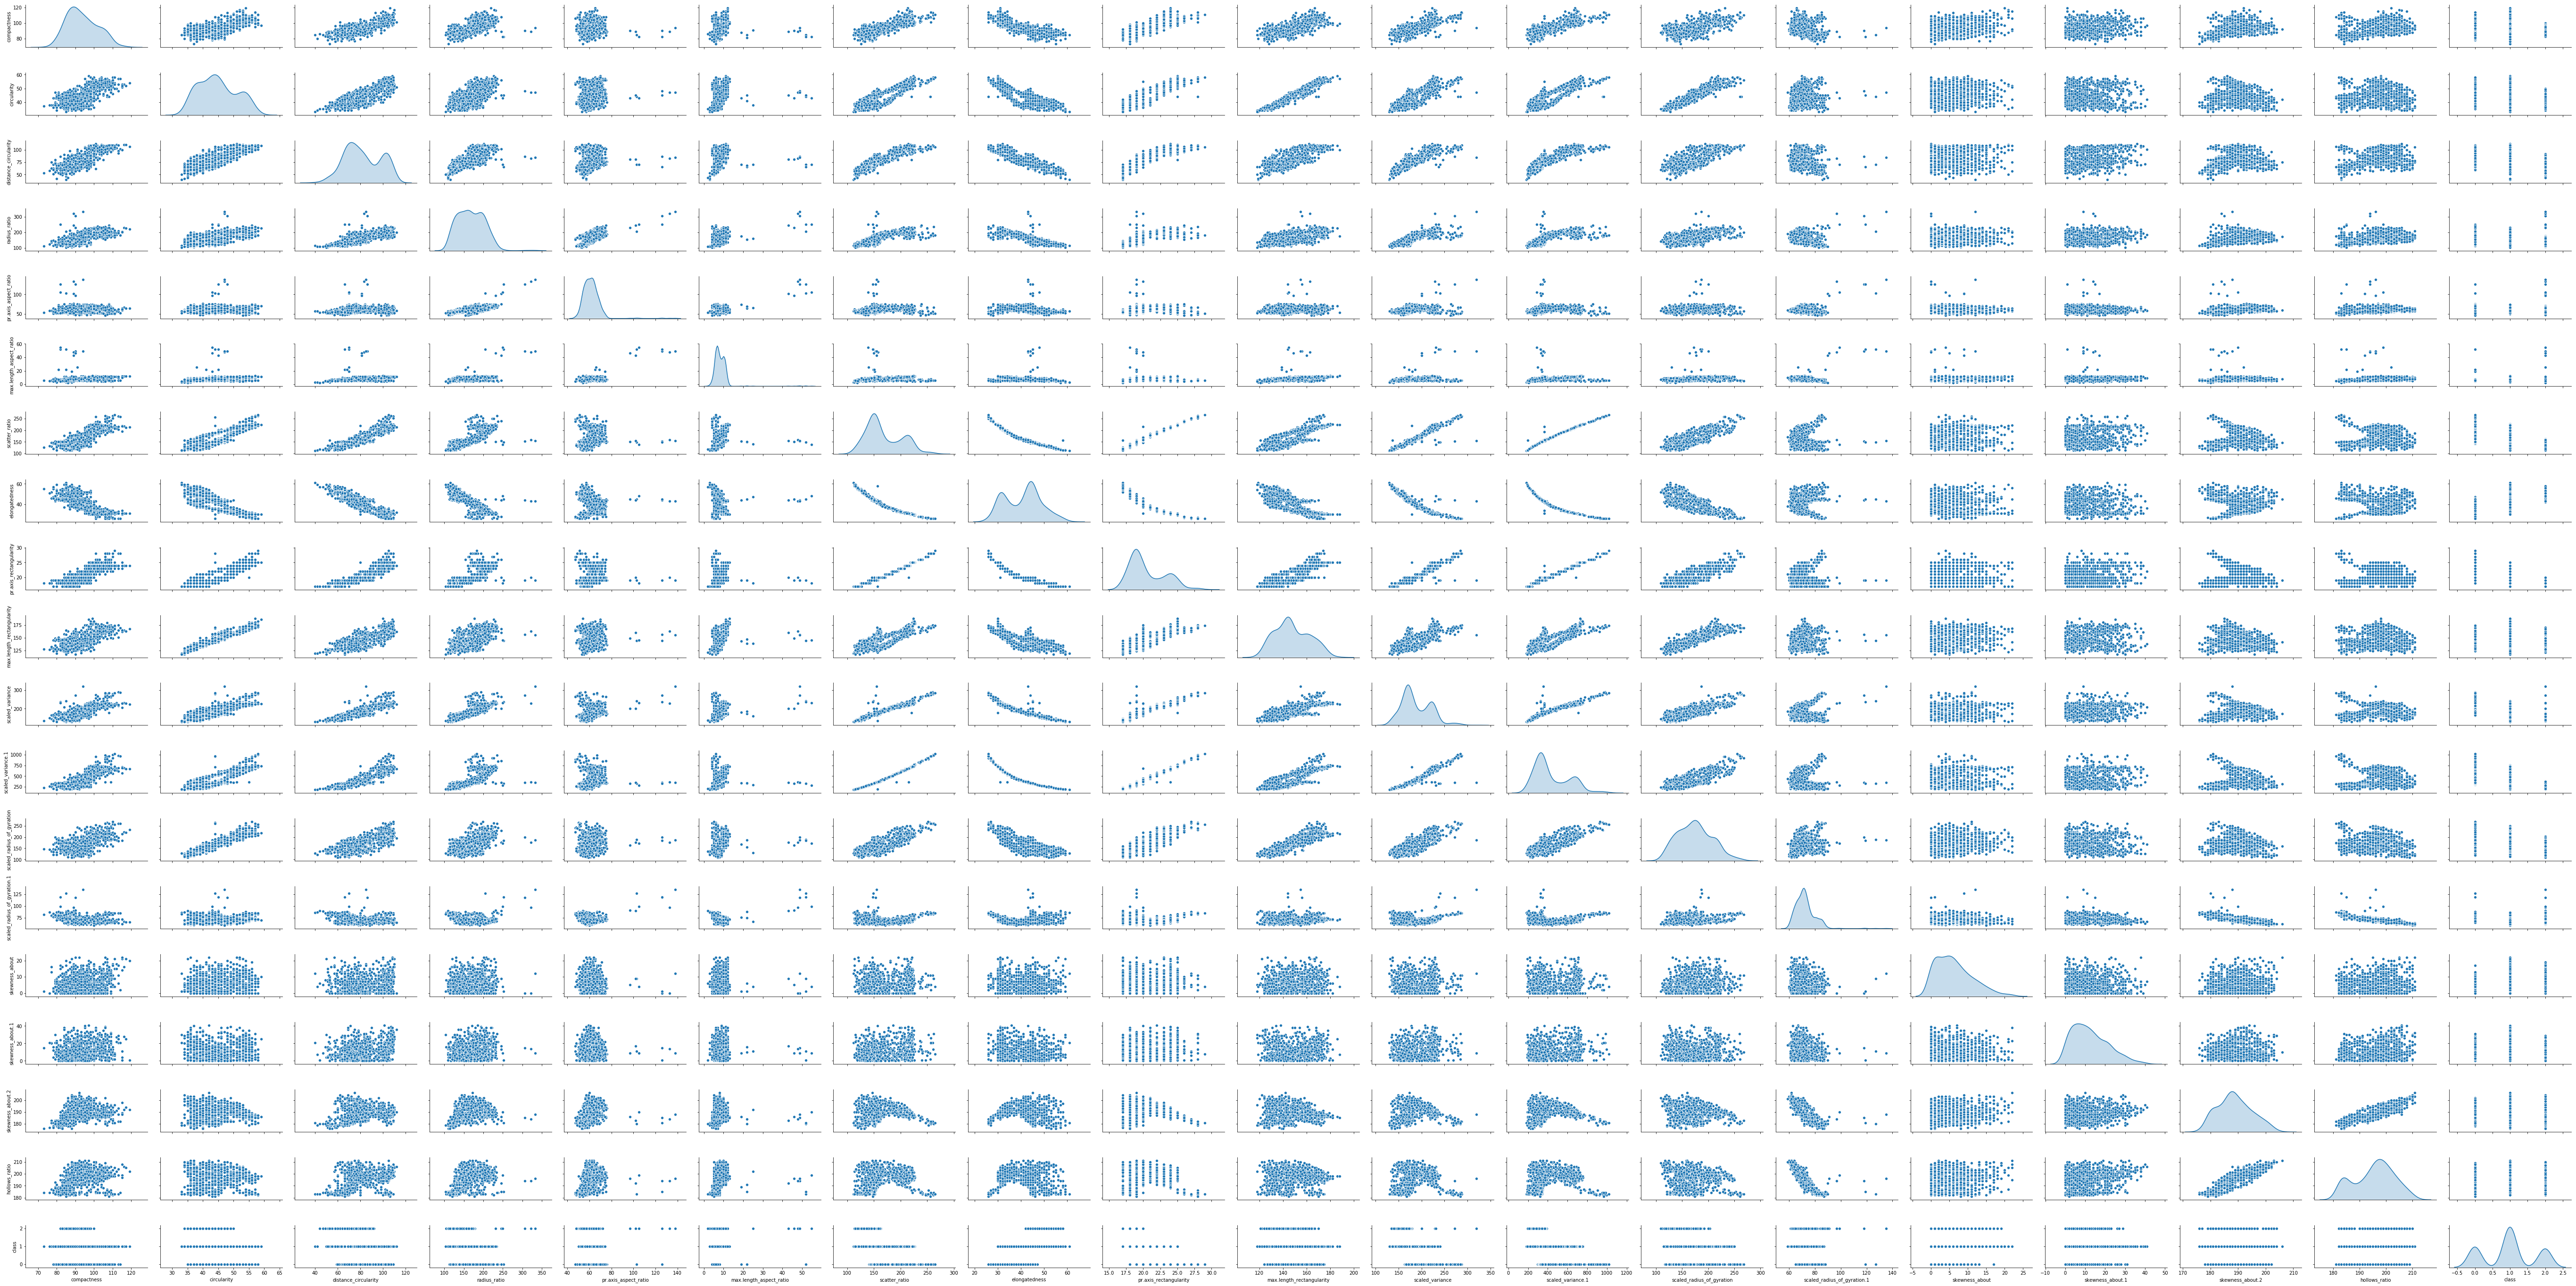

In [84]:
# plotting a pairplot to do bivariate analysis to find relation between different independent variable
sns.pairplot(vehicle_data, diag_kind="kde", height=2, aspect=2)

In [85]:
# Removing highly correlated features to avoid multicollinearity
vehicle_data_modified = vehicle_data.drop(["pr.axis_rectangularity", "scaled_variance", "scaled_variance.1"], axis=1)
vehicle_data_modified.shape

(846, 16)

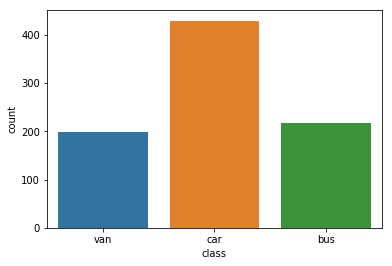

In [86]:
# Distribution of categorical variable
sns.countplot("class", data=vehicles_df)

Reasoning:

Removed features "pr.axis_rectangularity", "scaled_variance", "scaled_variance.1" as they are highly correlated ( >= 0.95 ) with "scatter_ratio" 

### 3. Split  train and test data

In [87]:
# Splitting dataset into target variable and predictors 
X = vehicle_data_modified.drop(["class"], axis=1)
Y = vehicle_data_modified["class"]

In [88]:
# Scaling data using Zscore for PCA
X_Scaled = X.apply(zscore)
X_Scaled.head()

compactness  circularity  distance_circularity  radius_ratio  \
0     0.160580     0.518073              0.057177      0.273363   
1    -0.325470    -0.623732              0.120741     -0.835032   
2     1.254193     0.844303              1.519141      1.202018   
3    -0.082445    -0.623732             -0.006386     -0.295813   
4    -1.054545    -0.134387             -0.769150      1.082192   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0              1.310398                 0.311542      -0.207598   
1             -0.593753                 0.094079      -0.599423   
2              0.548738                 0.311542       1.148719   
3              0.167907                 0.094079      -0.750125   
4              5.245643                 9.444962      -0.599423   

   elongatedness  max.length_rectangularity  scaled_radius_of_gyration  \
0       0.136262                   0.758332                   0.285705   
1       0.520519                  -0.344578                  -0.513630   
2      -1.144597                   0.689401                   1.392477   
3       0.648605                  -0.344578                  -1.466683   
4       0.520519                  -0.275646                   0.408680   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                    -0.327326       -0.073812          0.380870   
1                    -0.059384        0.538390          0.156798   
2                     0.074587        1.558727         -0.403383   
3                    -1.265121       -0.073812         -0.291347   
4                     7.309005        0.538390         -0.179311   

   skewness_about.2  hollows_ratio  
0         -0.312012       0.183957  
1          0.013265       0.452977  
2         -0.149374       0.049447  
3          1.639649       1.529056  
4         -1.450481      -1.699181

In [89]:
# Splitting dataset into train and test set
x_train, x_test, y_train, y_test = train_test_split(X_Scaled, Y, test_size = 0.3, random_state = 1)

### 4. Train SVM and get accuracy

In [90]:
svm = SVC()
start_time = time.time()
svm.fit(x_train, y_train)
score_svm = svm.score(x_test, y_test)
print (score_svm)
elapsed_time = time.time() - start_time
print("Elapsed Time: ", elapsed_time)

0.952755905511811
Elapsed Time:  0.015931129455566406


### 5. K-Fold Cross validation

In [91]:
def get_cross_validation_score(k, model, X, Y):
    '''
    Returns the cross validation score and prints mean score along with standard deviation
    '''
    k_fold = KFold(n_splits = k, shuffle=True, random_state = 1)
    cv_score = cross_val_score(svm, X, Y, cv= k_fold)
    
    mean_cv_score = cv_score.mean()
    std_cv_score = cv_score.std()

    print("mean cross validation score:", mean_cv_score, "standard deviation:", std_cv_score)
    return cv_score

In [92]:
# 10-Fold Cross validation
# We have used K=10 as this is usually a default choice for this purpose 

cv_score = get_cross_validation_score(10, svm, X_Scaled, Y)
cv_score

mean cross validation score: 0.962156862745098 standard deviation: 0.016684052791717804


array([0.97647059, 0.95294118, 0.96470588, 0.96470588, 0.96470588,
       0.96470588, 0.97619048, 0.92857143, 0.94047619, 0.98809524])

### 6. PCA

In [93]:
# Applying PCA for dimensionality reduction
pca = PCA(n_components=len(vehicle_data_modified.columns)-1)
pca.fit(X_Scaled)
print(pca.explained_variance_ratio_)

[0.44841926 0.19750227 0.12286232 0.07529487 0.0610516  0.03191056
 0.02255365 0.01458784 0.00926587 0.00581586 0.00391701 0.00277046
 0.00177227 0.00137755 0.00089862]


Text(0.5,0,'eigen Value')

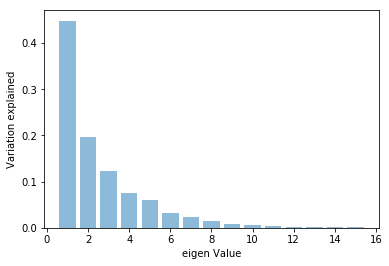

In [94]:
plt.bar(list(range(1,len(vehicle_data_modified.columns))),pca.explained_variance_ratio_,alpha=0.5, align='center')
plt.ylabel('Variation explained')
plt.xlabel('eigen Value')

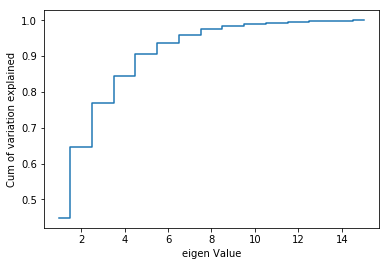

In [95]:
# Step plot to determine value of eigen values which can explain 95% of the variation 
plt.step(list(range(1,len(vehicle_data_modified.columns))),np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('eigen Value')
plt.show()

From the cumulative variation explained plot, we can see that 7 eigen values explain ~95% of the variation

In [96]:
# Applying PCA with 7 components 
pca7 = PCA(n_components=7)
pca7.fit(X_Scaled)
print("Components :", pca7.components_)
print("Variation Explained Ratio :", pca7.explained_variance_ratio_)
print("Total Variation explained = ", pca7.explained_variance_ratio_.sum())
Xpca7 = pca7.transform(X_Scaled)

Components : [[-0.32670478 -0.34760511 -0.36045267 -0.32662253 -0.11547865 -0.13047562
  -0.36208116  0.36379157 -0.33755314 -0.31636429  0.04817461 -0.06023332
  -0.06319758 -0.06201871 -0.11917385]
 [-0.09546395  0.17019359 -0.03595063 -0.15194401 -0.09609697  0.04060619
   0.08225833 -0.0224839   0.16074926  0.25004911  0.49129483 -0.04333221
  -0.12787199 -0.53954007 -0.52945065]
 [-0.14374768 -0.06801787 -0.082032    0.26377856  0.64694681  0.58685961
  -0.12333094  0.08264883 -0.05933887 -0.07568634  0.27967998 -0.1406243
  -0.05829238  0.0218805   0.04789256]
 [ 0.04594198  0.11650589 -0.12646477 -0.04999959  0.0649716   0.031497
  -0.1402589   0.12276241  0.11207681  0.13834664 -0.05187626  0.60812879
  -0.70738484  0.13782909  0.04757032]
 [ 0.06848693 -0.08839777  0.0359277  -0.04627906 -0.03685088  0.2140119
  -0.01903923  0.08016057 -0.06453613 -0.06393713  0.14694003  0.73660632
   0.58932186 -0.09737243 -0.03001309]
 [-0.15302014  0.2070377   0.0802731  -0.34198612 -0.320

In [97]:
Xpca7 = pd.DataFrame(Xpca7)

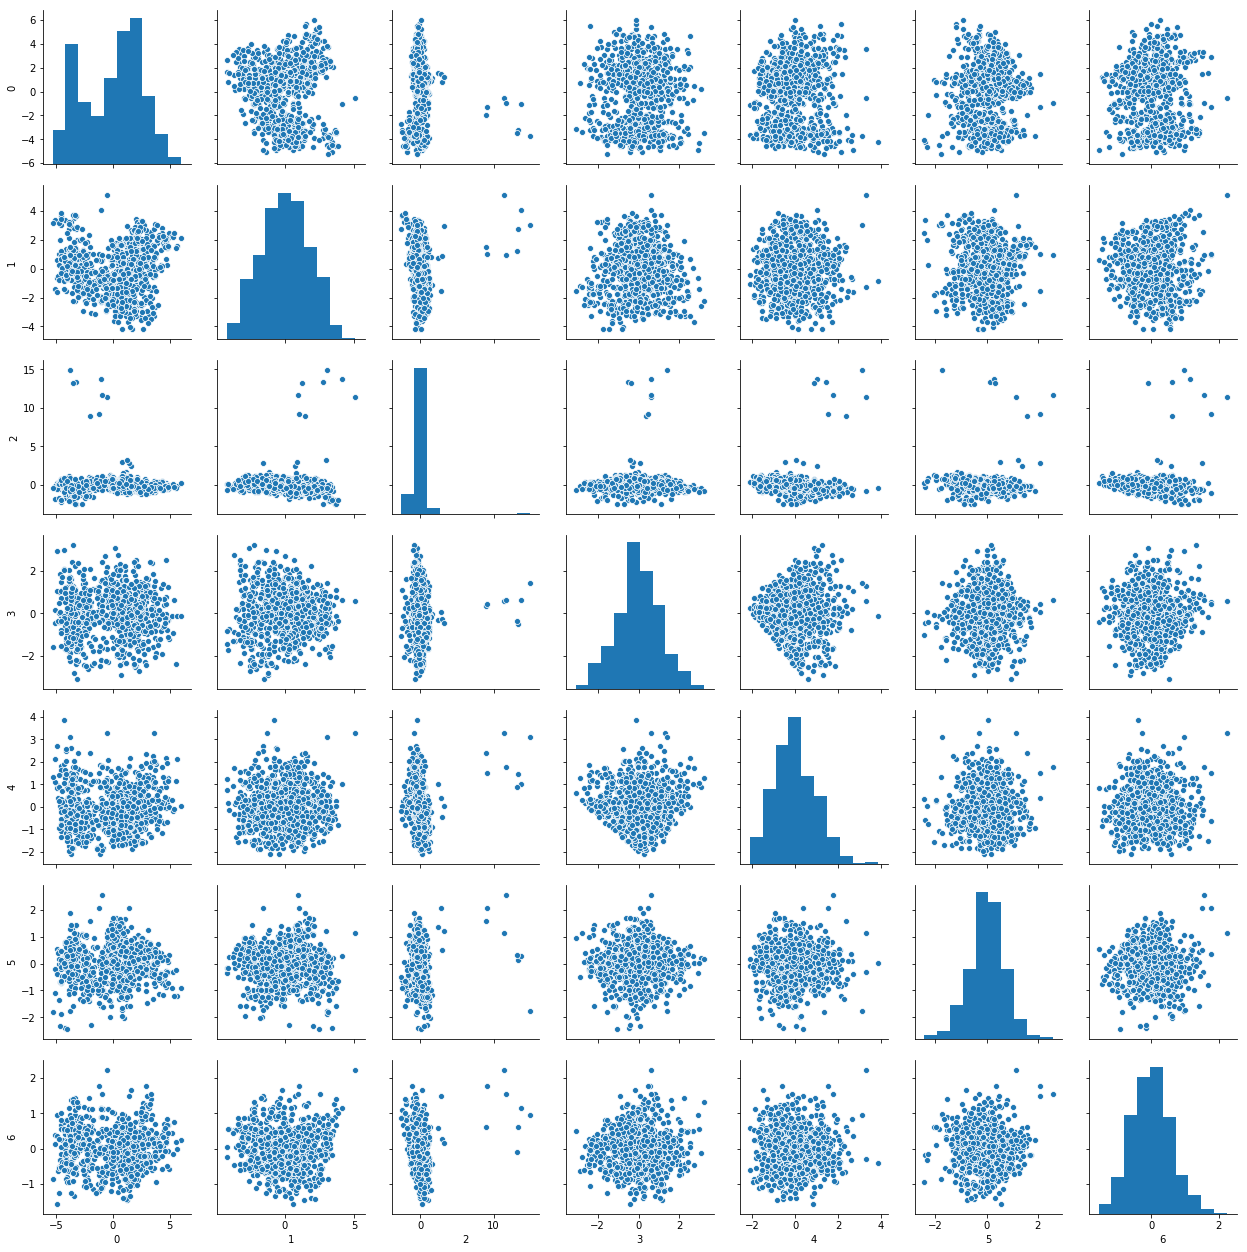

In [98]:
# Pairplot to visualise relation between new features
sns.pairplot(Xpca7)

Features look more independent after applying PCA

### 7. SVM with PCA

In [99]:
x_train_pca, x_test_pca, y_train_pca, y_test_pca = train_test_split(Xpca7, Y, test_size = 0.3, random_state = 1)

svm_pca = SVC()
start_time = time.time()
svm_pca.fit(x_train_pca, y_train_pca)
score_svm_pca = svm_pca.score(x_test_pca, y_test_pca)
print (score_svm_pca)
elapsed_time = time.time() - start_time
print("Elapsed Time: ", elapsed_time)

0.905511811023622
Elapsed Time:  0.030921459197998047


In [100]:
# 10-Fold Cross validation
# We have used K=10 as this is usually a default choice for this purpose

cv_score_pca = get_cross_validation_score(10, svm_pca, Xpca7, Y)
cv_score_pca

mean cross validation score: 0.9172549019607843 standard deviation: 0.020496259808009554


array([0.92941176, 0.92941176, 0.88235294, 0.91764706, 0.94117647,
       0.90588235, 0.92857143, 0.91666667, 0.88095238, 0.94047619])

### 8. Comparison of accuracy scores 

In [101]:
# Comparison table for accuracy scores with and without PCA
comparison_df = pd.DataFrame(data=[[score_svm, cv_score.mean(), cv_score.std()], 
                                   [score_svm_pca, cv_score_pca.mean(), cv_score_pca.std()]],
                             index = ["SVM", "SVM-PCA"], 
                             columns = ["Accuracy Score", "Cross Validation Score", "Standard Deviation"])
comparison_df

Accuracy Score  Cross Validation Score  Standard Deviation
SVM            0.952756                0.962157            0.016684
SVM-PCA        0.905512                0.917255            0.020496

Findings:

1. SVM has a higer accuracy without using PCA with a difference of ~5% as an effect of PCA using features only to explain 95% of variance whereas SVM without PCA has all the features

2. As the dataset is small, PCA could only reduce execution time by very little (SVM duration: 0.02194 vs SVM with PCA duration: 0.01595) however this difference would be higher as the size of dataset incereases.

3. Mean cross validation score for both SVM and SVM with PCA are higher than the model accuracy score.

4. SVM has a standard deviation of ~1.7% (accuracy range: ~95% +/- 1.7%) and SVM with PCA has a standard deviation of ~2% (accuracy range: ~91% +/- 2.0%)